In [1]:
import scSherlock as sh
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')

/home/croizer/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Load the data
adata = sc.read_h5ad('/home/croizer/Documents/02_Analysis/02_scSherlock/hao_2021_SCT.h5ad')
cell_type_column = "celltype.l3"
patient_column = "donor"


In [ ]:

#adata = sc.read_h5ad('/home/croizer/Downloads/HBCA_reed_2024.h5ad')
#cell_type_column = "author_cell_type"
#patient_column = "donor_id"


In [ ]:
# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25],
    scoring_method=sh.ScoringMethod.DIFF,
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100,
    min_patients=3,
    min_reads=10,
    sparse_step=5,
    n_jobs=-1
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata,
    column_ctype=cell_type_column,
    column_patient=patient_column,
    config=config
)

2025-04-01 12:02:53,521 - ScSherlock - INFO - ScSherlock initialized with (161764, 20729) data matrix


In [5]:
top_markers = scherlock.run()


2025-04-01 11:07:13,662 - ScSherlock - INFO - Calculating theoretical scores...
Aggregating Samples: 100%|██████████| 7308/7308 [00:02<00:00, 2501.64it/s]
2025-04-01 11:08:16,152 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-01 11:08:16,154 - ScSherlock - INFO - Applying multi-category correction...
2025-04-01 11:08:16,286 - ScSherlock - INFO - Aggregating scores...
2025-04-01 11:08:16,428 - ScSherlock - INFO - Sorting scores...
2025-04-01 11:08:16,625 - ScSherlock - INFO - Filtering genes...
Aggregating Samples: 100%|██████████| 58/58 [00:03<00:00, 17.79it/s]
2025-04-01 11:08:25,411 - ScSherlock - INFO - Calculating empirical scores...
/home/croizer/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3

In [6]:
#scherlock.recompute_empirical('CD14 Mono', min_proportion=0.00001)

## Basic plotting 

2025-04-01 11:11:14,318 - ScSherlock - INFO - Plotting 51 genes for 51 cell types using empiric model


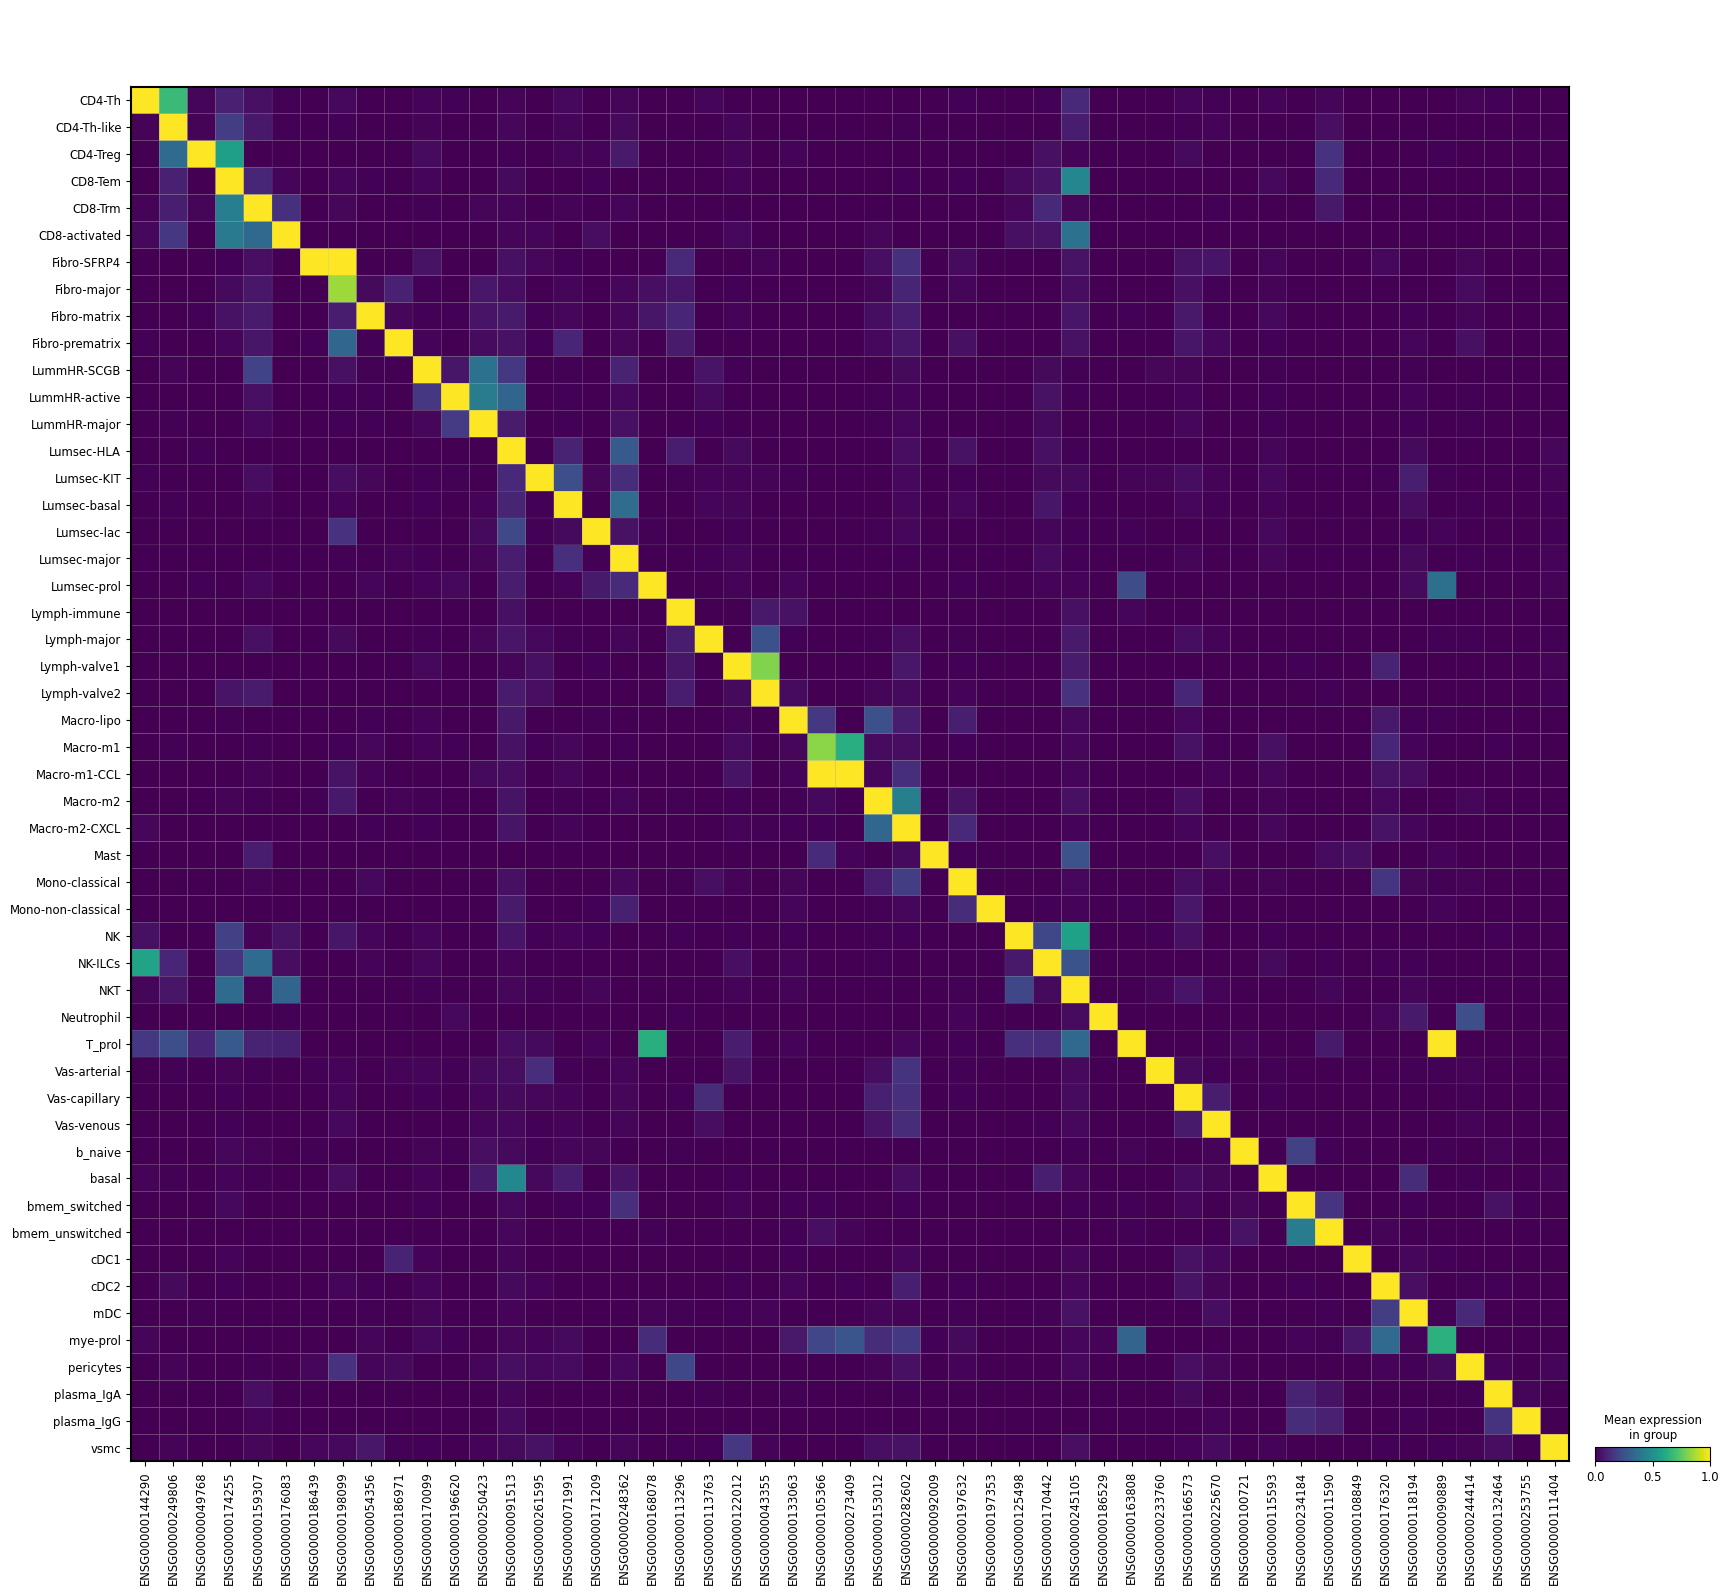

In [7]:
scherlock.plot_marker_heatmap(n_genes=1, cutoff=0.2,remove_ctype_no_marker=True)

In [8]:
scherlock.visualize_marker(gene="COL26A1")

ValueError: Gene 'COL26A1' not found in the dataset

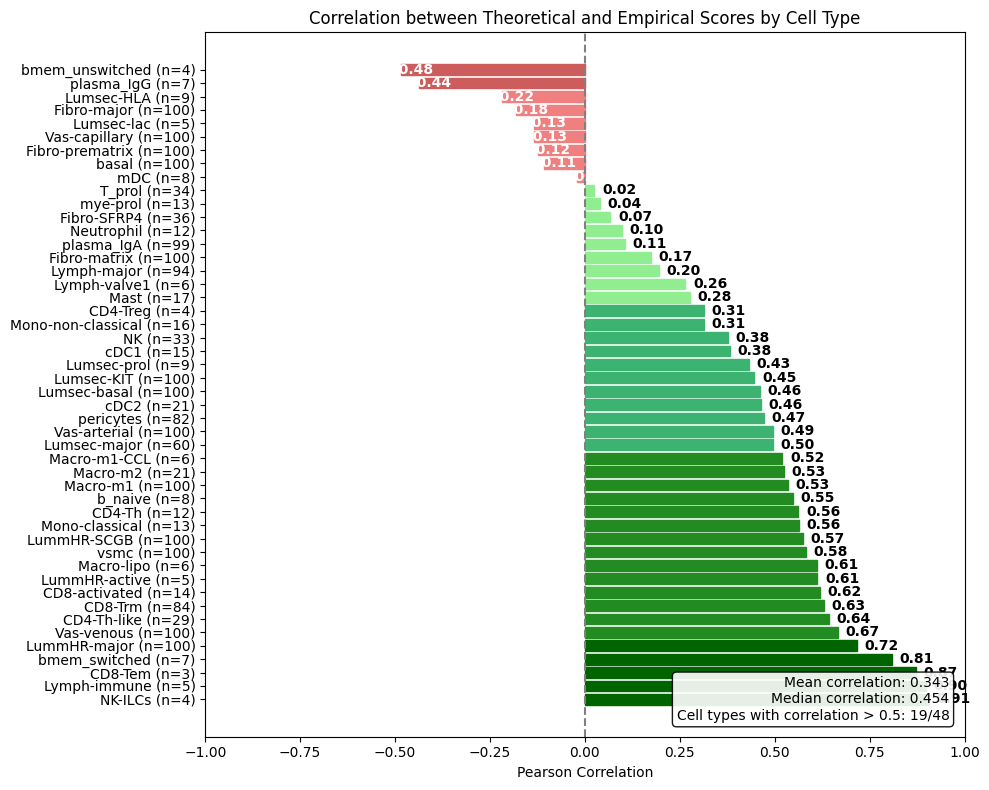

In [ ]:
fig = scherlock.plot_corr_theoric_empiric(min_genes=3)

## Exporting results 

In [ ]:
ctype = 'CD14 Mono'
scherlock.get_scores('CD14 Mono', method='empiric')[ctype]

ValueError: Cell type 'CD14 Mono' not found in the dataset